Importing basic Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import collections
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as pyo
sns.set(style="darkgrid")
sns.set(font_scale=1.3)

import wordcloud
from wordcloud import WordCloud, STOPWORDS 

Considering the Cleaned Data So no pre processing wilbe required

In [ ]:
data_text = pd.read_csv("Cleaned_Text.csv")

In [ ]:
data_text.tail(10)

,Unnamed: 0,VAX_MANU,text,text_length
211317,660393,PFIZER\BIONTECH,echocardiogram electrocardiogram segment elev...,12
211318,660395,MODERNA,covid pneumonia cough decreased appetite men...,10
211319,660397,PFIZER\BIONTECH,pressure fluctuation dyspnoea hypotension slee...,8
211320,660398,PFIZER\BIONTECH,dyspnoea echocardiogram pericarditis,3
211321,660399,MODERNA,creactive protein covid coronavirus positive,7
211322,660402,MODERNA,erythema erythema nodosum vaccination complica...,5
211323,660403,PFIZER\BIONTECH,pressure decrease pressure measurement glomeru...,13
211324,660410,PFIZER\BIONTECH,laboratory menstrual disorder premature menopause,5
211325,660412,MODERNA,covid xray cough decreased appetite dyspnoea,8
211326,660413,MODERNA,electrocardiogram olfactory nerve disorder pne...,6


In [ ]:
import nltk
#nltk.download('book')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

In [ ]:
data_text["text"] = data_text['text'].str.replace(r'\b\w{15,3000}\b', r' ')

In [ ]:
data_text["text"] = data_text['text'].str.replace('deliver', '')
data_text["text"] = data_text['text'].str.replace('count', '')
data_text["text"] = data_text['text'].str.replace('rate', '')
data_text["text"] = data_text['text'].str.replace('skin', '')
data_text["text"] = data_text['text'].str.replace('blood', '')
data_text["text"] = data_text['text'].str.replace('decrease', '')
data_text["text"] = data_text['text'].str.replace('computerised', '')
data_text["text"] = data_text['text'].str.replace('head', '')
data_text["text"] = data_text['text'].str.replace('image', '')

In [ ]:
from collections import Counter
cnt = Counter()
for text in data_text['text'].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(20)

[('discomfort', 19238),
 ('disorder', 15540),
 ('dyspnoea', 15422),
 ('pruritus', 15036),
 ('erythema', 14735),
 ('tomogram', 12644),
 ('hypoaesthesia', 11579),
 ('paraesthesia', 11553),
 ('vaccination', 10833),
 ('asthenia', 10093),
 ('abdominal', 9988),
 ('heart', 9093),
 ('negative', 8617),
 ('hyperhidrosis', 8096),
 ('xray', 7797),
 ('peripheral', 7631),
 ('magnetic', 7596),
 ('resonance', 7595),
 ('oral', 7530),
 ('reaction', 7527)]

In [ ]:
data_text['Sentiment_Scores'] = data_text['text'].apply(lambda x:sia.polarity_scores(x)['compound'])

In [ ]:
data_text['Sentiment'] = data_text['Sentiment_Scores'].apply(lambda s : 
                                                             'Negative - Low' if s > -0.05 else ('Negative - High' if s < -0.5 
                                                                                             else 'Negative - Med'))

In [ ]:
data_text.head(5)

,Unnamed: 0,VAX_MANU,text,text_length,Sentiment_Scores,Sentiment
0,2,PFIZER\BIONTECH,discomfort dysphagia visual impairment,4,-0.4215,Negative - Med
1,4,MODERNA,erythema pruritus warmth,3,0.4588,Negative - Low
2,6,MODERNA,abdominal sleep disorder,3,-0.4019,Negative - Med
3,7,MODERNA,diarrhoea nasal congestion,3,0.0000,Negative - Low
4,8,MODERNA,vaccination erythema vaccination pruritus vacc...,5,0.0000,Negative - Low


In [ ]:
data_text.Sentiment.value_counts()

Negative - Low     121860
Negative - Med      55146
Negative - High     34321
Name: Sentiment, dtype: int64

<BarContainer object of 3 artists>

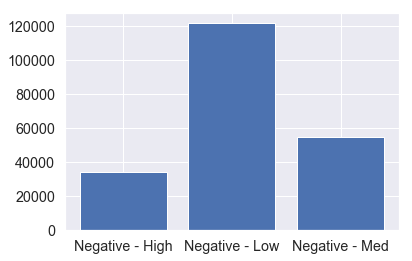

In [ ]:
array = np.array(data_text.Sentiment)
unique, counts = np.unique(array, return_counts=True)
np.column_stack((unique, counts)) 
plt.bar(unique, counts)

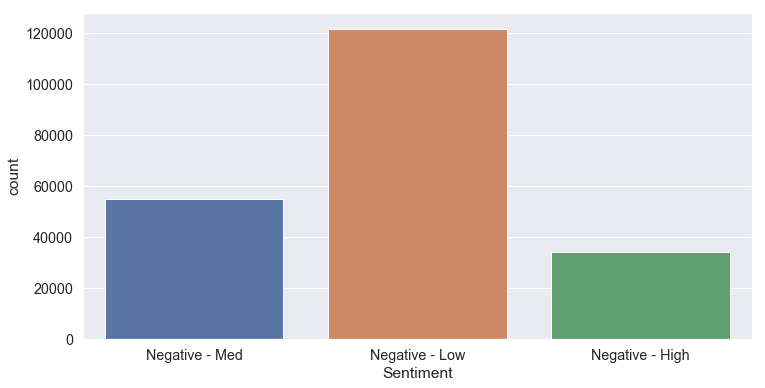

In [ ]:
temp = data_text.groupby('Sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

plt.figure(figsize=(12,6))
sns.countplot(x='Sentiment',data=data_text)
fig = go.Figure(go.Funnelarea(
    text =temp.Sentiment,
    values = temp.text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

In [ ]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(20)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

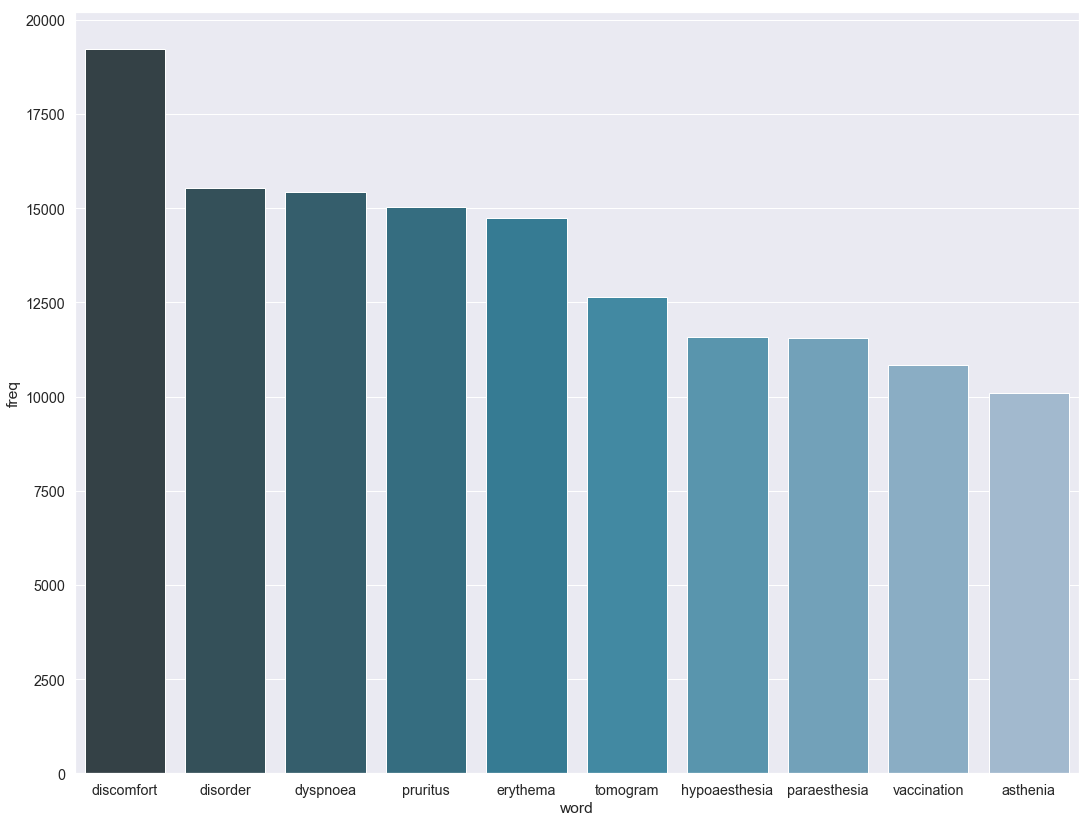

In [ ]:
sr_clean= data_text['text']
cv = CountVectorizer()
bow = cv.fit_transform(sr_clean)
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)

word_counter_df = pd.DataFrame(word_counter.most_common(10), columns = ['word', 'freq'])
fig, ax = plt.subplots(figsize=(18, 14))
sns.barplot(x="word", y="freq", data=word_counter_df, palette="PuBuGn_d", ax=ax)
plt.show();

In [ ]:
# Word Cloud - Overall

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words_1(text):
    pos_tagged_text = nltk.pos_tag(text)
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) 
    for word, pos in pos_tagged_text])

stopwords = lemmatize_words_1(data_text['text'])

comment_words = ' '

for val in data_text['text']: 
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
      comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 1800, height = 1200, 
                background_color ='white', max_words=100, 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
                      
plt.figure(figsize = (12, 12), facecolor = 'Red') 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off') 
plt.tight_layout(pad = 1) 
  
plt.show() 

KeyboardInterrupt: 

In [ ]:
## Filtering out the PFIZER\\BIONTECH

data_text_1 = data_text[data_text['VAX_MANU'] == 'PFIZER\\BIONTECH']

# Word Cloud

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words_1(text):
    pos_tagged_text = nltk.pos_tag(text)
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) 
    for word, pos in pos_tagged_text])

stopwords = lemmatize_words_1(data_text_1['text'])

comment_words = ' '

for val in data_text_1['text']: 
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
      comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 1800, height = 1200, 
                background_color ='white', 
                stopwords = stopwords, max_words=100,
                min_font_size = 10).generate(comment_words) 
                      
plt.figure(figsize = (12, 12), facecolor = 'Red') 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off') 
plt.tight_layout(pad = 1) 
  
plt.show() 

In [ ]:
sr_clean= data_text_1['text']
cv = CountVectorizer()
bow = cv.fit_transform(sr_clean)
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)

word_counter_df = pd.DataFrame(word_counter.most_common(10), columns = ['word', 'freq'])
fig, ax = plt.subplots(figsize=(18, 14))
sns.barplot(x="word", y="freq", data=word_counter_df, palette="PuBuGn_d", ax=ax)
plt.show();

NameError: name 'data_text_1' is not defined

In [ ]:
data_text_1 = data_text[data_text['VAX_MANU'] == 'PFIZER\\BIONTECH']
data_text_1.head(15)

,Unnamed: 0,VAX_MANU,text,text_length,Sentiment_Scores,Sentiment
0,2,PFIZER\BIONTECH,discomfort dysphagia visual impairment,4,-0.4215,Negative - Med
17,42,PFIZER\BIONTECH,flush tension ache,4,-0.5994,Negative - High
18,44,PFIZER\BIONTECH,hypoaesthesia peripheral ultrasound scan,4,0.0000,Negative - Low
23,61,PFIZER\BIONTECH,anosmia diarrhoea migraine,3,0.0000,Negative - Low
24,62,PFIZER\BIONTECH,paraesthesia parosmia burn sensation taste di...,7,-0.4019,Negative - Med
25,64,PFIZER\BIONTECH,cold hypoaesthesia paraesthesia,3,0.0000,Negative - Low
26,65,PFIZER\BIONTECH,xray tomogram facial paralysis,6,0.0000,Negative - Low
33,84,PFIZER\BIONTECH,tomogram magnetic resonance brain posture sp...,9,-0.4019,Negative - Med
34,85,PFIZER\BIONTECH,transient ischaemic attack,3,-0.4767,Negative - Med
36,95,PFIZER\BIONTECH,cough diarrhoea vesicle oropharyngeal,4,0.0000,Negative - Low


In [ ]:
data_text_1.Sentiment.value_counts()

Negative - Low     55042
Negative - Med     25186
Negative - High    16745
Name: Sentiment, dtype: int64

<BarContainer object of 3 artists>

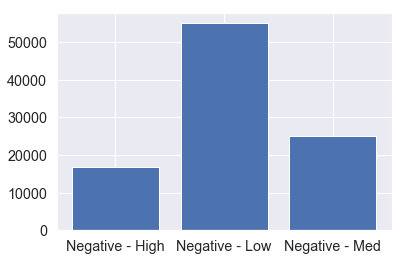

In [ ]:
array = np.array(data_text_1.Sentiment)
unique, counts = np.unique(array, return_counts=True)
np.column_stack((unique, counts)) 
plt.bar(unique, counts)

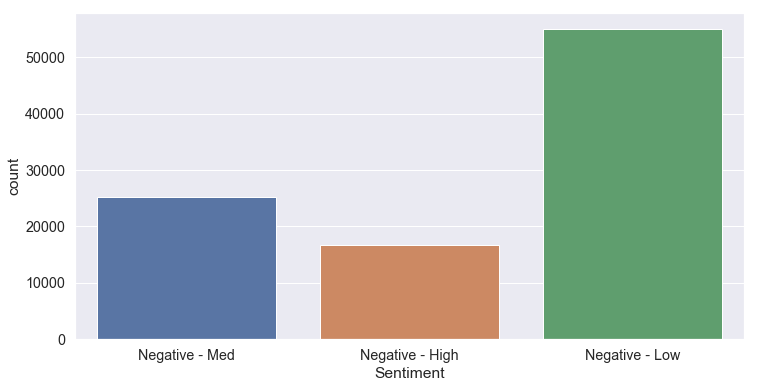

In [ ]:
temp = data_text_1.groupby('Sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

plt.figure(figsize=(12,6))
sns.countplot(x='Sentiment',data=data_text_1)
fig = go.Figure(go.Funnelarea(
    text =temp.Sentiment,
    values = temp.text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

In [ ]:
## Filtering out the MODERNA

data_text_2 = data_text[data_text['VAX_MANU'] == 'MODERNA']

# Word Cloud

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words_1(text):
    pos_tagged_text = nltk.pos_tag(text)
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) 
    for word, pos in pos_tagged_text])

stopwords = lemmatize_words_1(data_text_2['text'])

comment_words = ' '

for val in data_text_2['text']: 
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
      comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 1800, height = 1200, 
                background_color ='white', max_words=100,
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
                      
plt.figure(figsize = (12, 12), facecolor = 'Red') 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off') 
plt.tight_layout(pad = 1) 
  
plt.show() 

In [ ]:
sr_clean= data_text_2['text']
cv = CountVectorizer()
bow = cv.fit_transform(sr_clean)
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)

word_counter_df = pd.DataFrame(word_counter.most_common(10), columns = ['word', 'freq'])
fig, ax = plt.subplots(figsize=(18, 14))
sns.barplot(x="word", y="freq", data=word_counter_df, palette="PuBuGn_d", ax=ax)
plt.show();

In [ ]:
data_text_2 = data_text[data_text['VAX_MANU'] == 'MODERNA']
data_text_2.head(15)

,Unnamed: 0,VAX_MANU,text,text_length,Sentiment_Scores,Sentiment
1,4,MODERNA,erythema pruritus warmth,3,0.4588,Negative - Low
2,6,MODERNA,abdominal sleep disorder,3,-0.4019,Negative - Med
3,7,MODERNA,diarrhoea nasal congestion,3,0.0000,Negative - Low
4,8,MODERNA,vaccination erythema vaccination pruritus vacc...,5,0.0000,Negative - Low
5,10,MODERNA,pressure confusional state d appetite,6,-0.5267,Negative - High
6,11,MODERNA,dyspnoea discomfort,3,-0.4215,Negative - Med
7,12,MODERNA,heart heart hypertension chest,8,0.0000,Negative - Low
8,16,MODERNA,abdominal upper dysgeusia,3,0.0000,Negative - Low
9,17,MODERNA,pressure discomfort heart,4,-0.6124,Negative - High
10,18,MODERNA,erythema pruritus lymph node,5,0.0000,Negative - Low


In [ ]:
data_text_2.Sentiment.value_counts()

Negative - Low     54052
Negative - Med     23527
Negative - High    14068
Name: Sentiment, dtype: int64

<BarContainer object of 3 artists>

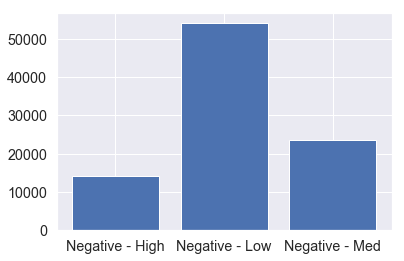

In [ ]:
array = np.array(data_text_2.Sentiment)
unique, counts = np.unique(array, return_counts=True)
np.column_stack((unique, counts)) 
plt.bar(unique, counts)

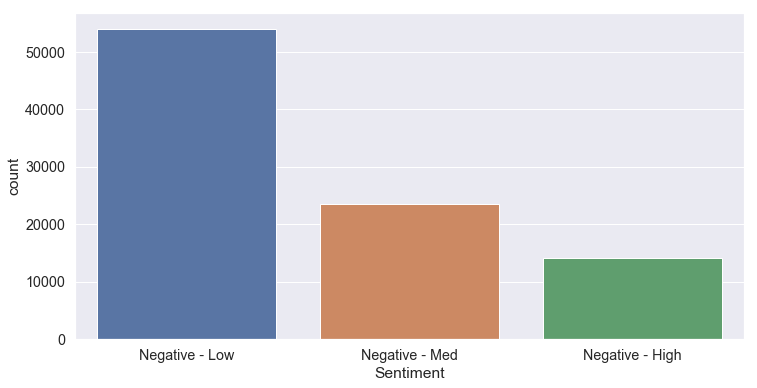

In [ ]:
temp = data_text_2.groupby('Sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

plt.figure(figsize=(12,6))
sns.countplot(x='Sentiment',data=data_text_2)
fig = go.Figure(go.Funnelarea(
    text =temp.Sentiment,
    values = temp.text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

In [ ]:
## Filtering out the JANSSEN

data_text_3 = data_text[data_text['VAX_MANU'] == 'JANSSEN']

# Word Cloud

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words_1(text):
    pos_tagged_text = nltk.pos_tag(text)
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) 
    for word, pos in pos_tagged_text])

stopwords = lemmatize_words_1(data_text_3['text'])

comment_words = ' '

for val in data_text_3['text']: 
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
      comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 1800, height = 1200, 
                background_color ='white', max_words=100,
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
                      
plt.figure(figsize = (12, 12), facecolor = 'Red') 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off') 
plt.tight_layout(pad = 1) 
  
plt.show() 

In [ ]:
sr_clean= data_text_3['text']
cv = CountVectorizer()
bow = cv.fit_transform(sr_clean)
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)

word_counter_df = pd.DataFrame(word_counter.most_common(10), columns = ['word', 'freq'])
fig, ax = plt.subplots(figsize=(18, 14))
sns.barplot(x="word", y="freq", data=word_counter_df, palette="PuBuGn_d", ax=ax)
plt.show();

In [ ]:
data_text_3 = data_text[data_text['VAX_MANU'] == 'JANSSEN']
data_text_3.head(15)

,Unnamed: 0,VAX_MANU,text,text_length,Sentiment_Scores,Sentiment
52504,167269,JANSSEN,burning sensation erythema grip strength hyp...,8,0.4939,Negative - Low
52505,167270,JANSSEN,hypoaesthesia immediate postinjection reaction...,7,-0.3182,Negative - Med
52506,167271,JANSSEN,muscular weakness paraesthesia vision blur,5,-0.2023,Negative - Med
53054,168823,JANSSEN,asthenia burning sensation diarrhoea,5,0.0000,Negative - Low
53598,170546,JANSSEN,flush hypoaesthesia oral,5,0.0000,Negative - Low
53740,171033,JANSSEN,bradycardia palpatory finding,4,0.0000,Negative - Low
53784,171223,JANSSEN,burn sensation irritation thirst,6,-0.5106,Negative - High
53865,171494,JANSSEN,heart stiffness neck somnolence,6,0.0000,Negative - Low
53912,171655,JANSSEN,respiratory retching,3,0.0000,Negative - Low
53971,171825,JANSSEN,anxiety back pressure diarrhoea,4,-0.4404,Negative - Med


In [ ]:
data_text_3.Sentiment.value_counts()

Negative - Low     12766
Negative - Med      6433
Negative - High     3508
Name: Sentiment, dtype: int64

<BarContainer object of 3 artists>

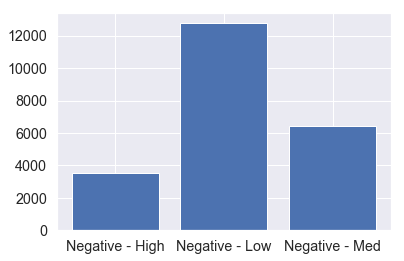

In [ ]:
array = np.array(data_text_3.Sentiment)
unique, counts = np.unique(array, return_counts=True)
np.column_stack((unique, counts)) 
plt.bar(unique, counts)

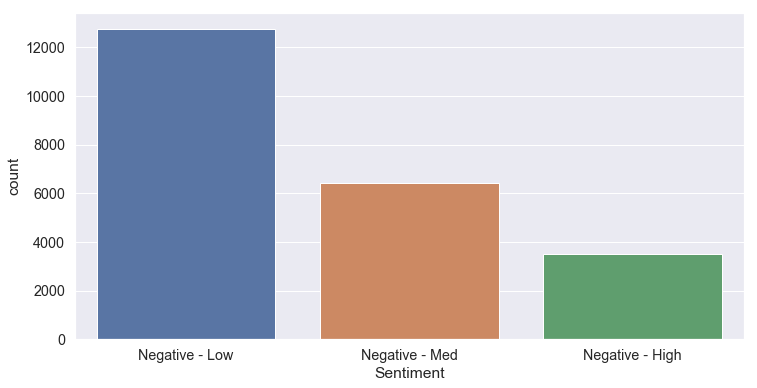

In [ ]:
temp = data_text_3.groupby('Sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

plt.figure(figsize=(12,6))
sns.countplot(x='Sentiment',data=data_text_3)
fig = go.Figure(go.Funnelarea(
    text =temp.Sentiment,
    values = temp.text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

*** Networrk Graph

In [ ]:
from nltk import bigrams
# Create list of lists containing bigrams in text
key_words = [text.lower().split() for text in data_text.text]
terms_bigram = [list(bigrams(text)) for text in key_words]
terms_bigram[0]

Network Graph using Top 30 Words

In [ ]:
## Overall

import itertools
bigrams = list(itertools.chain(*terms_bigram))
bigram_counts = collections.Counter(bigrams)

bigram_df = pd.DataFrame(bigram_counts.most_common(30),
                             columns=['bigram', 'count'])

import networkx as nx
d = bigram_df.set_index('bigram').T.to_dict('records')
G = nx.Graph()

for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

fig, ax = plt.subplots(figsize=(24, 16))

pos = nx.spring_layout(G, k=1)

nx.draw_networkx(G, pos,
                 font_size=15,
                 width=6,
                 edge_color='blue',
                 node_color='black',
                 with_labels = False,
                 ax=ax)

for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='white', alpha=0.25),
            horizontalalignment='right', 
            verticalalignment = 'center',
            fontsize=12)
    
plt.show()

**************************  End ****************************